In [7]:
import pandas as pd

In [8]:
import pandas as pd

# Correcting the file path and using raw string literal
file_path = r'C:/Users/sirve/Downloads/filename.csv'

# Load the dataset
df= pd.read_csv(file_path)

df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1609713284629807105,1609713284629807105,2023-01-02 00:48:48 UTC,2023-01-02,00:48:48,0,1222975145977040896,gabimartinsa,Gabi,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1609713284113907714,1609708650259677185,2023-01-02 00:48:48 UTC,2023-01-02,00:48:48,0,1577723797561643032,petadactyl,Dactyl,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Chaleck', 'name': '🌻Check In...",NaN,NaN,NaN,NaN
2,1609713280171253760,1609667082261512194,2023-01-02 00:48:47 UTC,2023-01-02,00:48:47,0,1608106109247651843,valetaizong,Vale L'italiana,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NYCyrano', 'name': 'NYCyrano...",NaN,NaN,NaN,NaN
3,1609713279945019392,1609650672823140352,2023-01-02 00:48:47 UTC,2023-01-02,00:48:47,0,1603803888578138112,yieldingperry,Perry Yielding,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Brav0s', 'name': 'Brandon de...",NaN,NaN,NaN,NaN
4,1609713274911875077,1609713274911875077,2023-01-02 00:48:46 UTC,2023-01-02,00:48:46,0,1534540191498547200,jackcouteau,Jack Couteau 🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10005 non-null  int64  
 1   conversation_id  10005 non-null  int64  
 2   created_at       10005 non-null  object 
 3   date             10005 non-null  object 
 4   time             10005 non-null  object 
 5   timezone         10005 non-null  int64  
 6   user_id          10005 non-null  int64  
 7   username         10005 non-null  object 
 8   name             10004 non-null  object 
 9   place            1 non-null      object 
 10  tweet            10005 non-null  object 
 11  language         10005 non-null  object 
 12  mentions         10005 non-null  object 
 13  urls             10005 non-null  object 
 14  photos           10005 non-null  object 
 15  replies_count    10005 non-null  int64  
 16  retweets_count   10005 non-null  int64  
 17  likes_count 

In [12]:
# List of important columns to keep
important_columns = ['tweet', 'language', 'replies_count', 'retweets_count', 'likes_count', 'hashtags']

# Drop all other columns
data= df[important_columns]

# Display the first few rows of the cleaned data
data.head()


,tweet,language,replies_count,retweets_count,likes_count,hashtags
0,Posse do Lula juntou representantes da Rússia ...,pt,0,0,0,[]
1,@Chaleck Over more than Taiwan. They hate The...,en,0,0,0,[]
2,@NYCyrano @ladyonorato @VeraVanHorne Questo è ...,it,0,0,0,[]
3,@Brav0s @DailyCaller Russia wont even own Russ...,nl,0,0,0,[]
4,Russia is a terrorist state. Russia must be ex...,en,0,0,0,[]


In [13]:
data.isnull().sum()

tweet             0
language          0
replies_count     0
retweets_count    0
likes_count       0
hashtags          0
dtype: int64

## Exploratory data analysis

#### Language distribution 

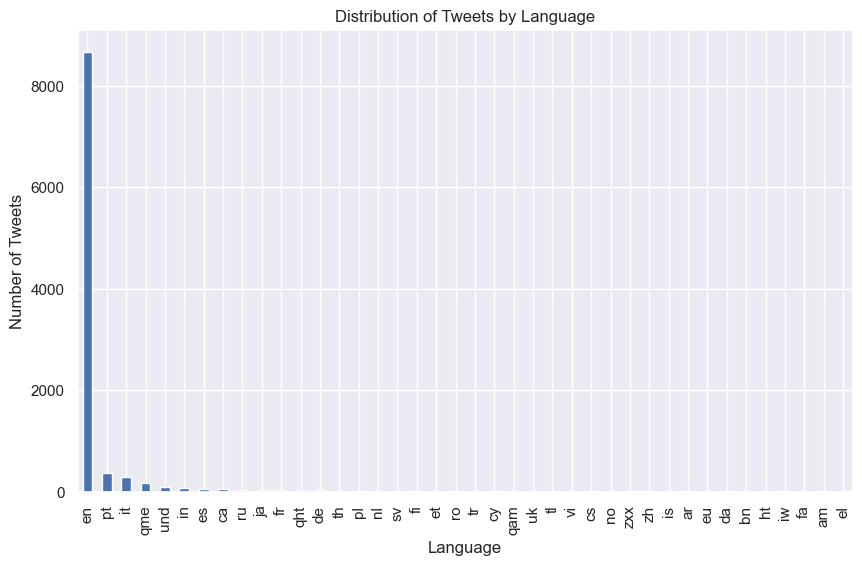

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# Language Distribution
language_distribution = data['language'].value_counts()
#print(language_distribution)

# Plot Language Distribution (optional, for verification)
plt.figure(figsize=(10, 6))
language_distribution.plot(kind='bar')
plt.title('Distribution of Tweets by Language')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.show()

#### Tweet length distribution 

count    10005.000000
mean       184.597301
std         90.947827
min          8.000000
25%        109.000000
50%        177.000000
75%        267.000000
max        949.000000
Name: tweet_length, dtype: float64


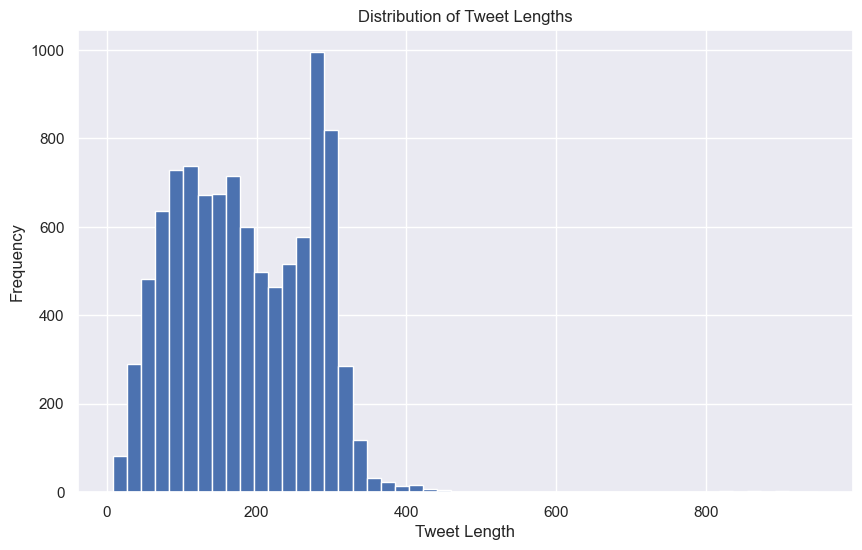

In [35]:
import warnings
warnings.filterwarnings('ignore')

# Tweet Length Distribution
data['tweet_length'] = data['tweet'].apply(len)
print(data['tweet_length'].describe())

# Plot Tweet Length Distribution (optional, for verification)
plt.figure(figsize=(10, 6))
data['tweet_length'].plot(kind='hist', bins=50)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


#### Most Common Words and Hashtags:

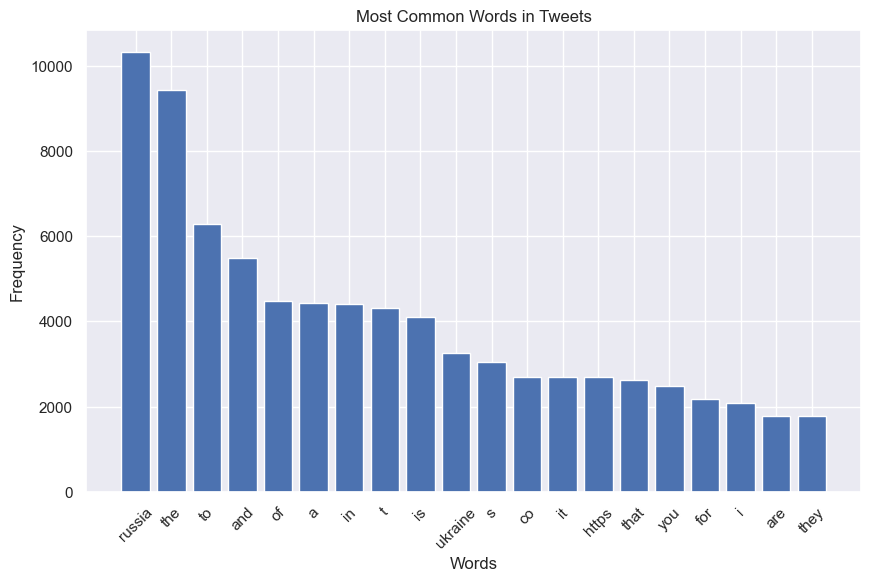

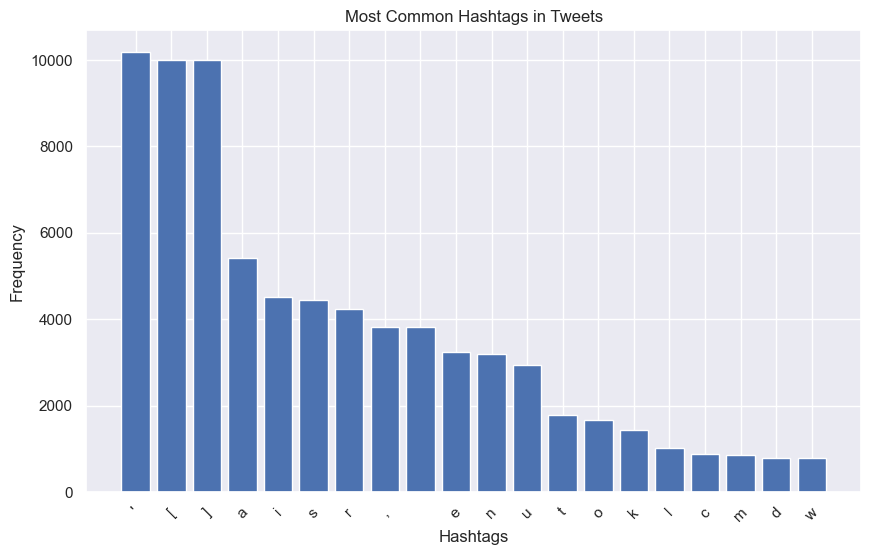

In [16]:
from collections import Counter
import re

# Common words
all_words = ' '.join(data['tweet']).lower()
all_words = re.findall(r'\b\w+\b', all_words)
common_words = Counter(all_words).most_common(20)

# Plot common words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Most Common Words in Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Common hashtags
all_hashtags = data['hashtags'].sum()
common_hashtags = Counter(all_hashtags).most_common(20)

# Plot common hashtags
hashtags, counts = zip(*common_hashtags)
plt.figure(figsize=(10, 6))
plt.bar(hashtags, counts)
plt.title('Most Common Hashtags in Tweets')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### User Engagement 

       replies_count  retweets_count   likes_count
count   10005.000000    10005.000000  10005.000000
mean        0.396402        0.536832      2.938131
std         2.025918        6.208667     35.370844
min         0.000000        0.000000      0.000000
25%         0.000000        0.000000      0.000000
50%         0.000000        0.000000      0.000000
75%         0.000000        0.000000      1.000000
max       118.000000      247.000000   2110.000000


<Figure size 1000x600 with 0 Axes>

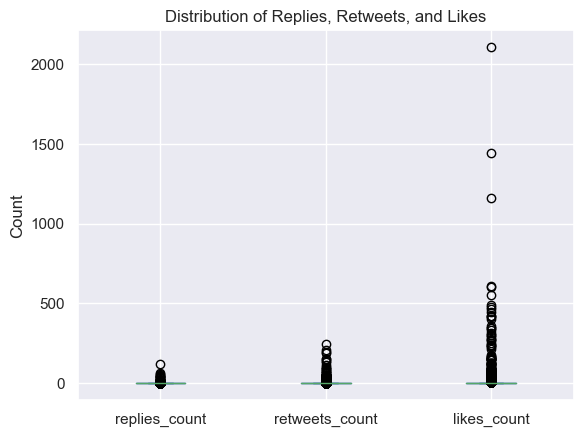

In [17]:
# User Engagement
print(data[['replies_count', 'retweets_count', 'likes_count']].describe())

# Plot User Engagement (optional, for verification)
plt.figure(figsize=(10, 6))
data[['replies_count', 'retweets_count', 'likes_count']].plot(kind='box')
plt.title('Distribution of Replies, Retweets, and Likes')
plt.ylabel('Count')
plt.show()


### Sentiment analysis

In [19]:
#pip install textblob

In [26]:
import re
from textblob import TextBlob
import warnings

warnings.filterwarnings('ignore')


# Extract the 'tweet' column
tweets = data['tweet'].dropna()

# Preprocess the text data
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower().strip()
    return text

tweets_cleaned = tweets.apply(preprocess_text)

# Function to analyze sentiment using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis using TextBlob
sentiment_scores_textblob = tweets_cleaned.apply(analyze_sentiment_textblob)

# Classify sentiment based on polarity score
def classify_sentiment_textblob(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

sentiment_classification_textblob = sentiment_scores_textblob.apply(classify_sentiment_textblob)

# Add the results to the original dataframe
data['cleaned_tweet'] = tweets_cleaned
data['sentiment_score'] = sentiment_scores_textblob
data['sentiment'] = sentiment_classification_textblob

# Display the first few rows of the updated dataframe
print(data[['tweet', 'cleaned_tweet', 'sentiment_score', 'sentiment']].head())


                                               tweet  \
0  Posse do Lula juntou representantes da Rússia ...   
1  @Chaleck Over more than Taiwan.  They hate The...   
2  @NYCyrano @ladyonorato @VeraVanHorne Questo è ...   
3  @Brav0s @DailyCaller Russia wont even own Russ...   
4  Russia is a terrorist state. Russia must be ex...   

                                       cleaned_tweet  sentiment_score  \
0  posse do lula juntou representantes da rssia e...         0.000000   
1  over more than taiwan  they hate the west and ...        -0.166667   
2  questo  il nazismo altro che neo e sta cercand...         0.000000   
3             russia wont even own russia in  months         0.600000   
4  russia is a terrorist state russia must be exp...        -0.350000   

  sentiment  
0   Neutral  
1  Negative  
2   Neutral  
3  Positive  
4  Negative  


In [27]:
# Function to create and display a bar plot for each sentiment category
def plot_sentiment(sentiment):
    sentiment_data = data[data['sentiment'] == sentiment]
    sentiment_counts = sentiment_data['sentiment'].value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='virAidis')
    plt.title(f'{sentiment} Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

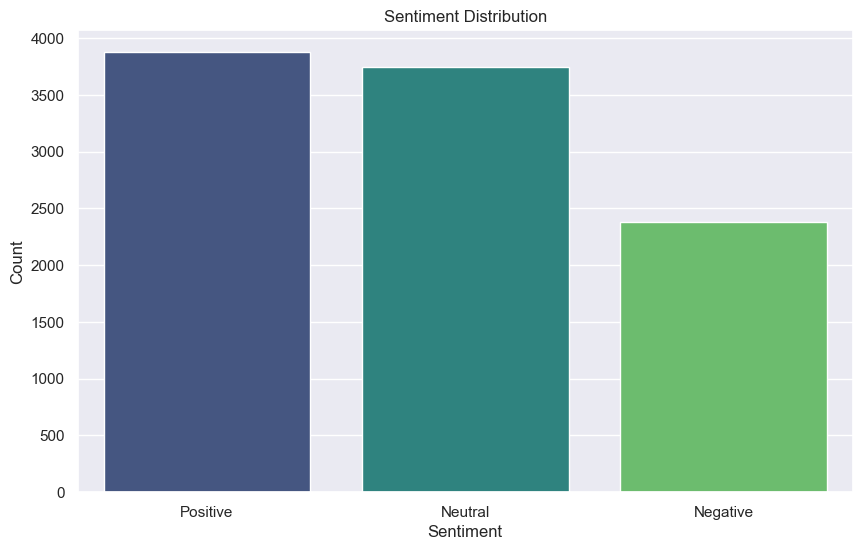

In [28]:
#Plot the sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
#pip install wordcloud

In [31]:
from wordcloud import WordCloud

def plot_wordcloud(sentiment):
    sentiment_data = data[data['sentiment'] == sentiment]
    text = ' '.join(sentiment_data['cleaned_tweet'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment} Sentiment Word Cloud')
    plt.axis('off')
    plt.show()

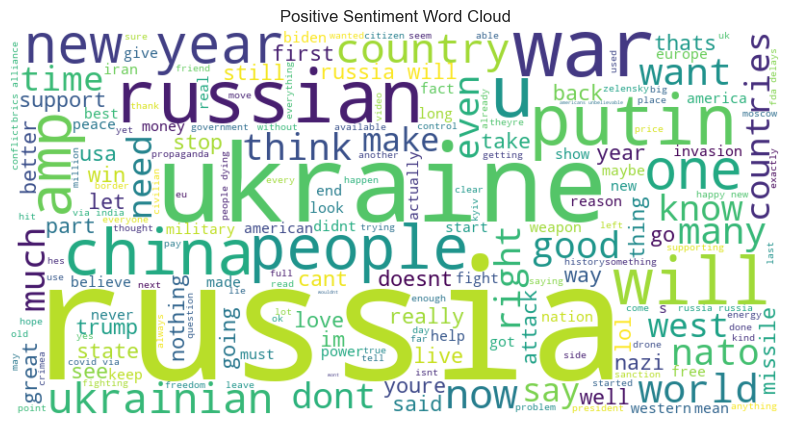

In [32]:
plot_wordcloud('Positive')

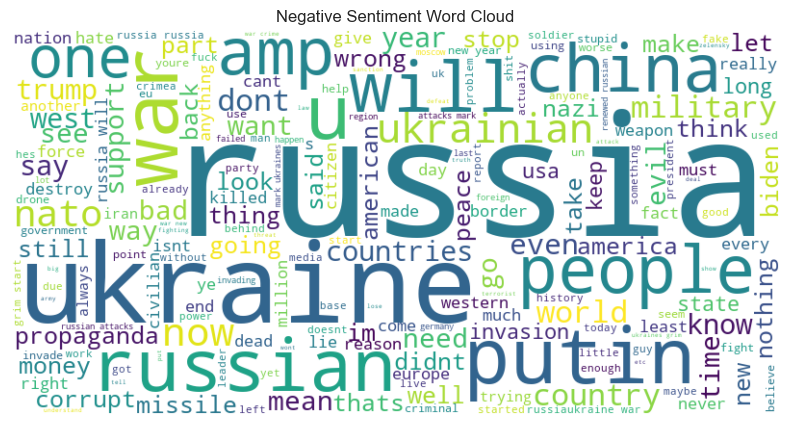

In [33]:
plot_wordcloud('Negative')

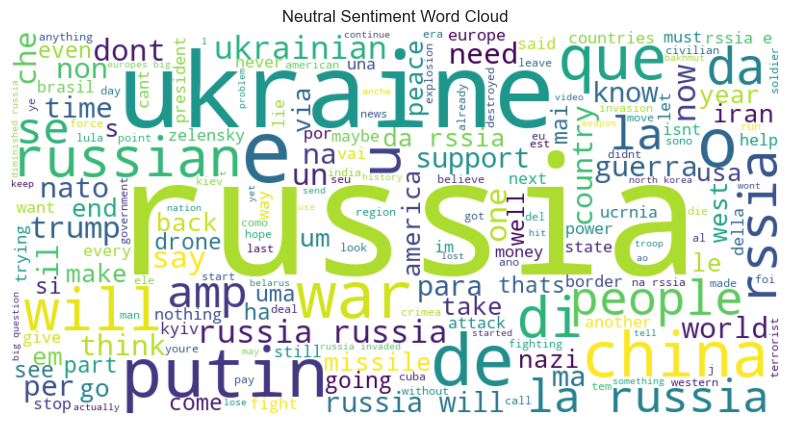

In [34]:
plot_wordcloud('Neutral')

In [36]:
pip install python-pptx


     ------------------------------------ 471.6/471.6 kB 304.3 kB/s eta 0:00:00


In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
prs = Presentation()

# Slide 1: Distribution of Tweets by Language
slide_1 = prs.slides.add_slide(prs.slide_layouts[5])  # Title and Content layout
title_1 = slide_1.shapes.title
title_1.text = "Distribution of Tweets by Language"

# Add the image
img_path_1 = '‪C:\Users\sirve\OneDrive\Desktop\images\output_10_0.png'  # Replace with the actual path
slide_1.shapes.add_picture(img_path_1, Inches(1), Inches(1.5), width=Inches(8.5))

# Add insights
text_box_1 = slide_1.shapes.add_textbox(Inches(1), Inches(5), Inches(8.5), Inches(2))
text_frame_1 = text_box_1.text_frame
text_frame_1.text = "Insights:\n- The vast majority of tweets are in English (en).\n- Smaller numbers of tweets are in Portuguese (pt) and French (fr)."

Slide 2: Distribution of Tweets by Length
slide_2 = prs.slides.add_slide(prs.slide_layouts[5])  # Title and Content layout
title_2 = slide_2.shapes.title
title_2.text = "Distribution of Tweets by Language"

# Add the image
img_path_2 = 'path_to_your_image_1.png'  # Replace with the actual path
slide_2.shapes.add_picture(img_path_2, Inches(1), Inches(1.5), width=Inches(8.5))

# Add insights
text_box_2 = slide_1.shapes.add_textbox(Inches(1), Inches(5), Inches(8.5), Inches(2))
text_frame_2 = text_box_2.text_frame
text_frame_2.text = "Insights:\n- The vast majority of tweets are in English (en).\n- Smaller numbers of tweets are in Portuguese (pt) and French (fr)."



# Slide 2: Distribution of Replies, Retweets, and Likes
slide_2 = prs.slides.add_slide(prs.slide_layouts[5])
title_2 = slide_2.shapes.title
title_2.text = "Distribution of Replies, Retweets, and Likes"

# Add the image
img_path_2 = 'path_to_your_image_2.png'  # Replace with the actual path
slide_2.shapes.add_picture(img_path_2, Inches(1), Inches(1.5), width=Inches(8.5))

# Add insights
text_box_2 = slide_2.shapes.add_textbox(Inches(1), Inches(5), Inches(8.5), Inches(2))
text_frame_2 = text_box_2.text_frame
text_frame_2.text = "Insights:\n- Most tweets have a low number of replies, retweets, and likes.\n- A few tweets have exceptionally high engagement, indicating a few highly viral tweets."

# Slide 3: Neutral Sentiment Word Cloud
slide_3 = prs.slides.add_slide(prs.slide_layouts[5])
title_3 = slide_3.shapes.title
title_3.text = "Neutral Sentiment Word Cloud"

# Add the image
img_path_3 = 'path_to_your_image_3.png'  # Replace with the actual path
slide_3.shapes.add_picture(img_path_3, Inches(1), Inches(1.5), width=Inches(8.5))

# Add insights
text_box_3 = slide_3.shapes.add_textbox(Inches(1), Inches(5), Inches(8.5), Inches(2))
text_frame_3 = text_box_3.text_frame
text_frame_3.text = "Insights:\n- Common words in neutral tweets include 'russia,' 'ukraine,' 'war,' and 'putin.'\n- Neutral tweets often discuss current events, particularly the Russia-Ukraine conflict."

# Save the presentation
prs.save('Sentiment_Analysis_Report.pptx')
